# Representation Learning Using Autoencoders

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

No GPU was detected. LSTMs and CNNs can be very slow without a GPU.


A couple utility functions to plot grayscale 28x28 image:

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

## What is representation learning?

* Representation learning is an area of research that focuses on how to learn compact, numerical representations for different sources of signal.
* Automatically discover the feature patterns in the data.
* These signals are most often video, text, audio, and image. 

## What is autoencoder?

* Artificial neural networks capable of learning **dense representations of the input data**, called **latent representations or codings, without any supervision**
    * Have a much lower dimensionality than the input data, **dimensionality reduction**
    * visualization
    * act as feature detectors, and they can be used for unsupervised **pretraining** of deep neural networks
    * generative models: they are capable of randomly **generating new data** that looks very similar to the training data
    
    
### The ideas:

* Autoencoders simply learn to **copy their inputs to their outputs.**
* constraining the network in various ways can **force it to learn efficient ways of representing the data,  learn the most important features in the input data (and drop the unimportant ones)**
    * limit the size of the latent representations
    * add noise to the inputs and train the network to recover the original inputs

### Efficient Data Representations

* Which of the following number sequences do you find the easiest to memorize? Can you find the pattern?

• 40, 27, 25, 36, 81, 57, 10, 73, 19, 68

• 50, 48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16, 14

### How does Autoencoder work?

* An autoencoder is always composed of two parts: 
    * an encoder (or recognition network) that converts the inputs to a latent representation, 
    * followed by a decoder (or generative network) that converts the internal representation to the outputs
    * **the number of neurons in the output layer must be equal to the number of inputs**
    * the cost function contains a reconstruction loss that penalizes the model when the reconstructions are different from the inputs



* The chess memory experiment (left) and a simple autoencoder (right)

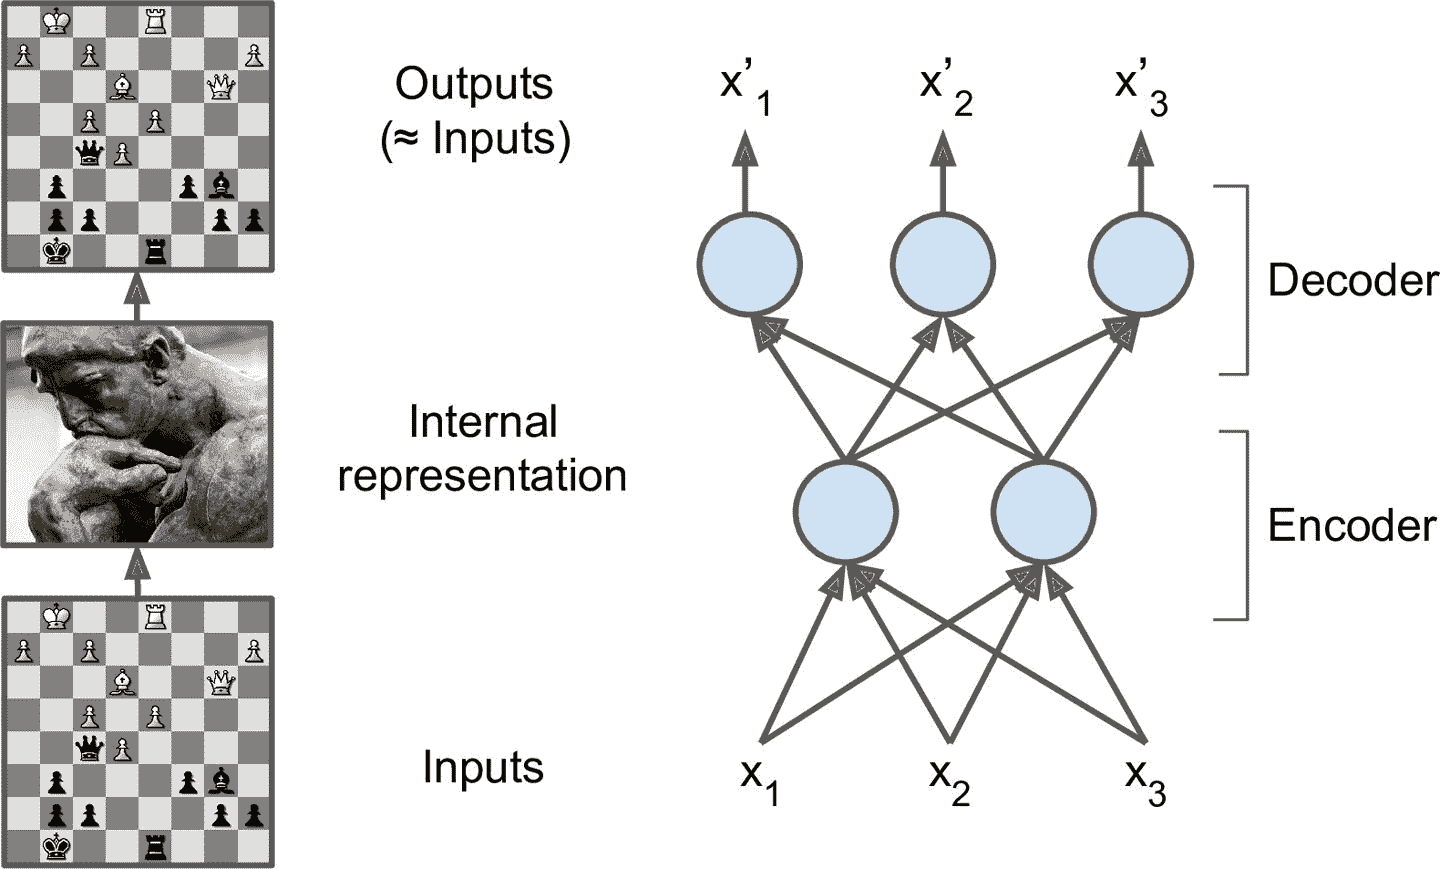

* an autoencoder looks at the inputs
* converts them to an efficient latent representation
* and then spits out something that (hopefully) looks very close to the inputs


# PCA with a linear Autoencoder

Build 3D dataset:

In [3]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

Now let's build the Autoencoder...

In [4]:
np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1.5))

* X_train, is used as both the inputs and the targets

In [5]:
history = autoencoder.fit(X_train, X_train, epochs=20) # simply equal to the inputs, e.g. X_train, is used as both the inputs and the targets

Epoch 1/20
2/2 [==============================] - 1s 15ms/step - loss: 0.2547
Epoch 2/20
2/2 [==============================] - 0s 9ms/step - loss: 0.1032
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0551
Epoch 4/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0503
Epoch 5/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0839
Epoch 6/20
2/2 [==============================] - 0s 3ms/step - loss: 0.2223
Epoch 7/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0913
Epoch 8/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0320
Epoch 9/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0242
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0189
Epoch 11/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 12/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 13/20
2/2 [==============================] - 0s 4ms/step - loss: 0

In [6]:
codings = encoder.predict(X_train)

Saving figure linear_autoencoder_pca_plot


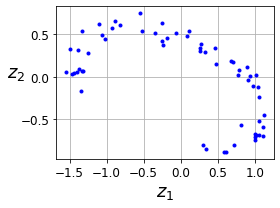

In [7]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
save_fig("linear_autoencoder_pca_plot")
plt.show()

### Notes:

* unsupervised learning, **self-supervised learning** -- automatically generate the labels from the data itself, train a model on the resulting “labeled” dataset using supervised learning techniques
* We organized the autoencoder into two subcomponents: **the encoder and the decoder**. 
* Both are regular Sequential models with a single Dense layer each, 
* and the autoencoder is a **Sequential model containing the encoder followed by the decoder** (remember that a model can be used as a layer in another model).
* The autoencoder’s **number of outputs is equal to the number of inputs** (i.e., 3).
* To perform simple PCA, we do not use any activation function (i.e., all neurons are linear), and the cost function is the MSE. We will see more complex autoencoders shortly.



### original 3D dataset (on the left) and the output of the autoencoder’s hidden layer (i.e., the coding layer, on the right)



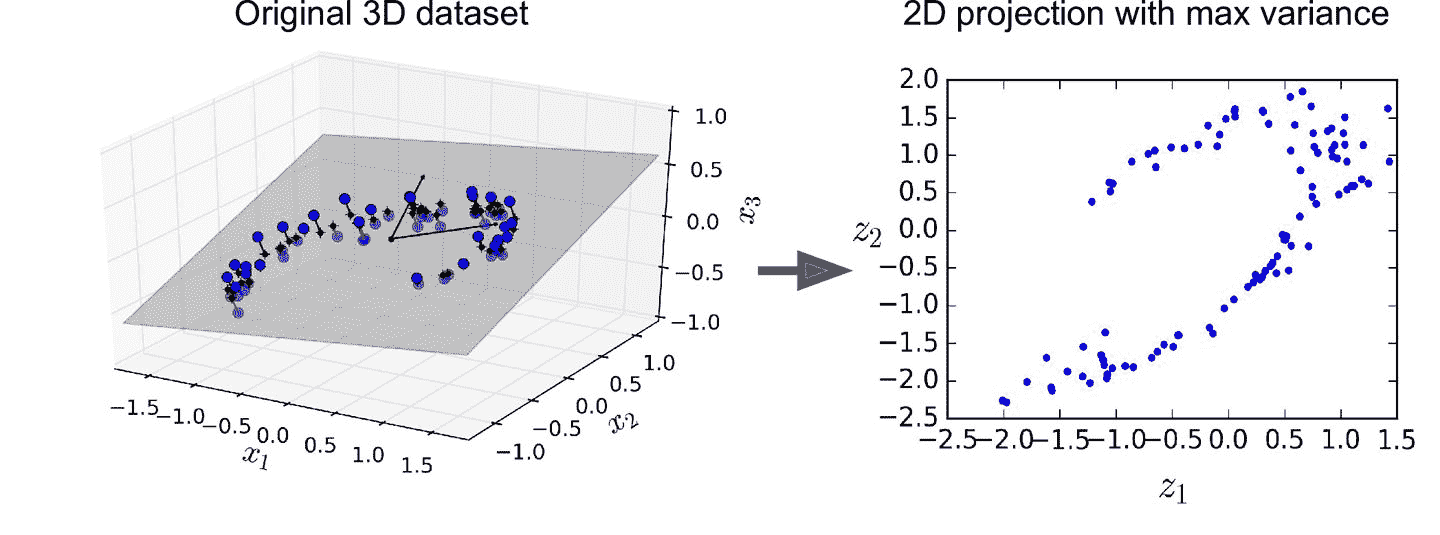


# Stacked Autoencoders or Deep Autoencoders

* autoencoders can have multiple hidden layers
* Adding more layers helps the autoencoder learn more complex codings.
* **DO NOT make the autoencoder too powerful**, it will not have learned any useful data representation in the process



***The architecture of a stacked autoencoder is typically symmetrical with regard to the central hidden layer (the coding layer).***
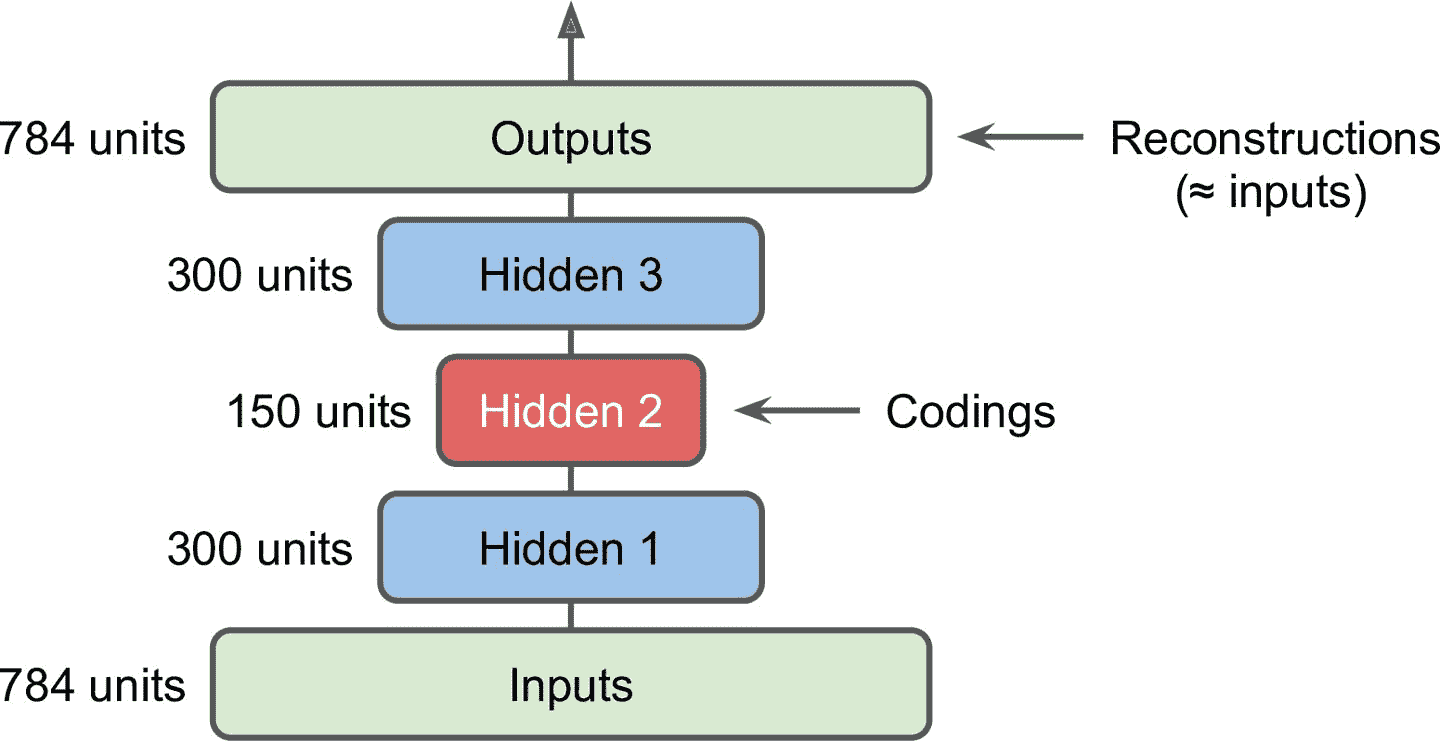

Let's use MNIST:

In [8]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

## Train all layers at once

Let's build a stacked Autoencoder with 3 hidden layers and 1 output layer (i.e., 2 stacked Autoencoders).

In [13]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [14]:
tf.random.set_seed(42)
np.random.seed(42)

* split the autoencoder model into two submodels: the encoder and the decoder.

In [15]:
stacked_encoder = keras.models.Sequential([
    
    #28 × 28–pixel grayscale images, flattens them so that each image is represented as a vector of size 784
    keras.layers.Flatten(input_shape=[28, 28]),
        
    # two Dense layers of diminishing sizes
    keras.layers.Dense(100, activation="selu"),
    # the encoder outputs a vector of size 30
    keras.layers.Dense(30, activation="selu"),
])

stacked_decoder = keras.models.Sequential([
    
    # The decoder takes codings of size 30 (output by the encoder) and processes them through two Dense layers of increasing sizes (100 units then 784 units)
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    
    # it reshapes the final vectors into 28 × 28 arrays so the decoder’s outputs have the same shape as the encoder’s inputs.
    keras.layers.Reshape([28, 28])
])

# now connect them together
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

# binary cross-entropy loss: each pixel(or each label) intensity represents the probability that the pixel should be black
# so model converges faster
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])

# using X_train as both the inputs and the targets 
# and similarly, we use X_valid as both the validation inputs and targets
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3381 - rounded_accuracy: 0.8870 - val_loss: 0.3166 - val_rounded_accuracy: 0.9002
Epoch 2/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3056 - rounded_accuracy: 0.9152 - val_loss: 0.3021 - val_rounded_accuracy: 0.9198
Epoch 3/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2986 - rounded_accuracy: 0.9216 - val_loss: 0.2986 - val_rounded_accuracy: 0.9198
Epoch 4/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2948 - rounded_accuracy: 0.9249 - val_loss: 0.2938 - val_rounded_accuracy: 0.9286
Epoch 5/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2923 - rounded_accuracy: 0.9272 - val_loss: 0.2919 - val_rounded_accuracy: 0.9286
Epoch 6/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2904 - rounded_accuracy: 0.9289 - val_loss: 0.2915 - val_rounded_accuracy: 0.9305
Epoch 7/20
1719/1719 [==================

***Notes: Difference between losses and metrics:***

Losses:

* losses (e.g., cross entropy) are used to train a model by Gradient Descent, in order to **minimize a cost function**(a cost function measures how bad your model is).
* must be **differentiable** (at least where they are evaluated), 
* their gradients **should not be 0 everywhere**. 
* it’s OK if they are **not easily interpretable** by humans
    
Metrics:
    
* metrics (e.g., accuracy) are used to **evaluate a model**
* more easily **interpretable**
* **can be non-differentiable** or have 0 gradients everywhere


## Visualizing the Reconstructions

* compare the inputs and the outputs
* the differences should not be too significant

This function processes a few test images through the autoencoder and displays the original images and their reconstructions:

In [9]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

Saving figure reconstruction_plot


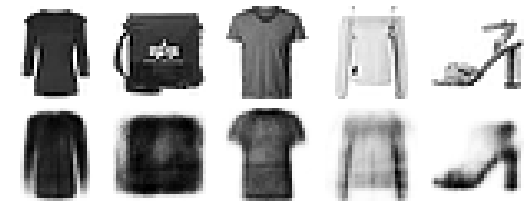

In [16]:
show_reconstructions(stacked_ae)
save_fig("reconstruction_plot")

***Ideas to improve it***

*  train the model for longer
* make the encoder and decoder deeper
* make the codings larger

# Visualizing Fashion MNIST

### An intuitive introduction of t-SNE in visualization

* [Comprehensive Guide on t-SNE algorithm with implementation in R & Python](https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/)

* (t-SNE) t-Distributed Stochastic Neighbor Embedding is a **non-linear dimensionality reduction** algorithm used for exploring high-dimensional data.

* It maps multi-dimensional data to **two or more dimensions suitable for human observation**. 
* With help of the t-SNE algorithms, you may have to plot fewer exploratory data analysis plots next time you work with high dimensional data.

PCA vs t-SNE

* PCA is a **linear algorithm**. It will not be able to interpret complex polynomial relationship between features. 
* On the other hand, t-SNE is based on probability distributions with random walk on **neighborhood graphs** to find the structure within the data.

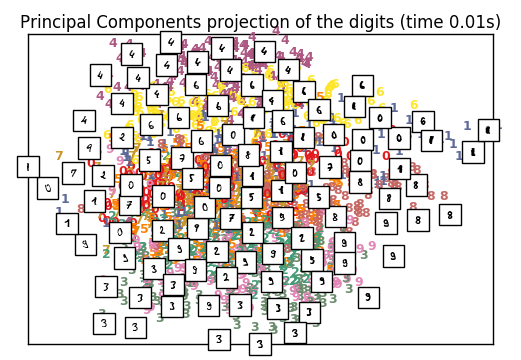

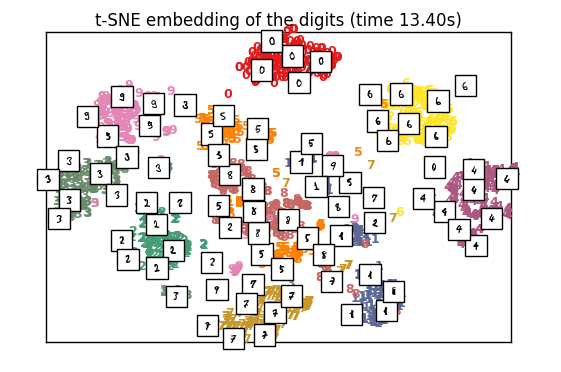

### sklearn's t-SNE implementation to animate embedding process

* The aim of tSNE is to **cluster small “neighborhoods” of similar data points** while also reducing the overall dimensionality of the data so it is **more easily visualized.** 
* In other words, the tSNE **objective function measures how well these neighborhoods of similar data** are preserved in the 2 or 3-dimensional space, and **arranges them into clusters** accordingly.

* [Realtime tSNE Visualizations](https://ai.googleblog.com/2018/06/realtime-tsne-visualizations-with.html)
* [tSNE-Animation](https://github.com/KellerJordan/tSNE-Animation)

<img src="https://tinyurl.com/398adrxn" width="750" align="center">

## The ideas of combining dimensionality reduction with visualization

* we have trained a **stacked autoencoder**, we can use it to **reduce the dataset’s dimensionality**
* one big advantage of autoencoders is that they can **handle large datasets**, with many instances and many features
* So here we use an autoencoder to **reduce the dimensionality down to a reasonable level**, then use another dimensionality reduction algorithm for visualization
* we use the encoder from our stacked autoencoder to reduce the dimensionality down to 30,
* use Scikit-Learn’s implementation of the **t-SNE algorithm to reduce the dimensionality down to 2 for visualization**


In [17]:
np.random.seed(42)

from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

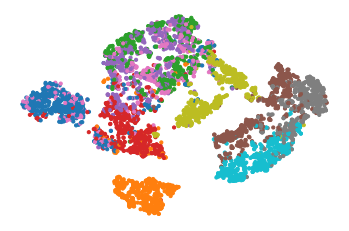

In [18]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.axis("off")
plt.show()

Let's make this diagram a bit prettier:

Saving figure fashion_mnist_visualization_plot


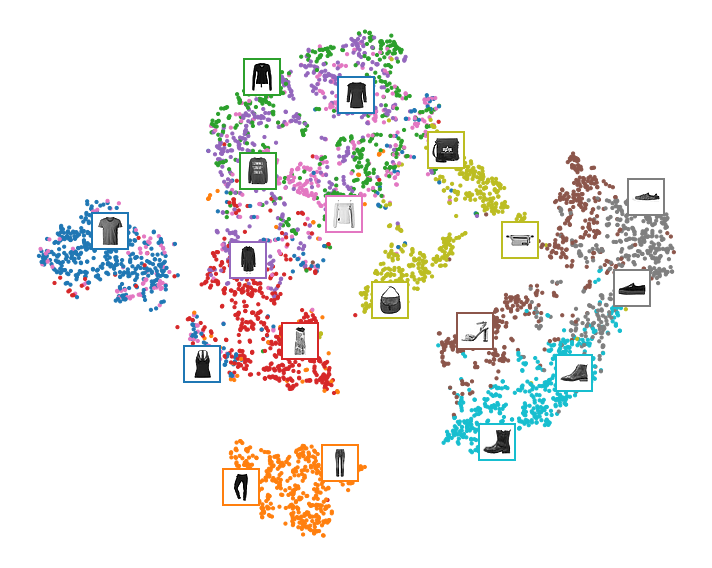

In [19]:
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
save_fig("fashion_mnist_visualization_plot")
plt.show()

***Some observations***

* The t-SNE algorithm identified several **clusters which match the classes** reasonably well (each class is represented with a different color)
* **autoencoders** work well for for **dimensionality reduction**

## Unsupervised Pretraining Using Stacked Autoencoders

* **Transfer Learning** with Keras, Reusing pretrained layers

* tackling a complex supervised task but you **do not have a lot of labeled training data**, one solution is to find a neural network that performs a similar task and **reuse its lower layers**





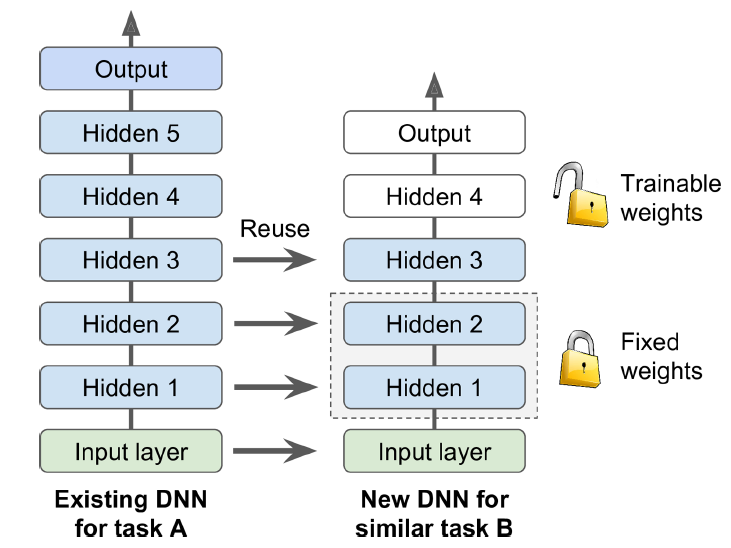

In the MNIST problem,

* If the input pictures of your new task don’t have **the same size as the ones used in the original task**, resize them to the size expected by the original model. 
* More generally, transfer learning will work best when the inputs have **similar low-level features.**

* The **output layer** of the original model should usually be **replaced**
* upper hidden layers of the original model are less likely to be as useful as the lower layers, since the **high-level features that are most useful for the new task** may differ significantly from the ones that were most useful for the original task. You want to **find the right number of layers to reuse.**

In [23]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # leave the two classes for model B
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 
    y_B = (y[y_5_or_6] == 6).astype(np.float32) 
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [24]:
tf.random.set_seed(42)
np.random.seed(42)

#Construction Phase
model_A = keras.models.Sequential()
model_A.add( keras.layers.Flatten(input_shape=[28,28]) ) # to 1D
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add( keras.layers.Dense(n_hidden, activation="selu") )#hidden layers

model_A.add(keras.layers.Dense(8, activation="softmax")) # output layers

model_A.compile( loss="sparse_categorical_crossentropy",
                 optimizer=keras.optimizers.SGD(lr=1e-3),
                 metrics=["accuracy"] )

history = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.5901 - accuracy: 0.8106 - val_loss: 0.3733 - val_accuracy: 0.8707
Epoch 2/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3514 - accuracy: 0.8779 - val_loss: 0.4174 - val_accuracy: 0.8275
Epoch 3/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3173 - accuracy: 0.8897 - val_loss: 0.3408 - val_accuracy: 0.8769
Epoch 4/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2974 - accuracy: 0.8977 - val_loss: 0.2878 - val_accuracy: 0.8993
Epoch 5/20
1375/1375 [==============================] - 6s 5ms/step - loss: 0.2839 - accuracy: 0.9027 - val_loss: 0.2743 - val_accuracy: 0.9007
Epoch 6/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2737 - accuracy: 0.9071 - val_loss: 0.2876 - val_accuracy: 0.8970
Epoch 7/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2652 - accuracy: 0.9099 - val_loss: 0.2865 - val_accuracy:

In [25]:
# First, you need to load model A and create a new model based on that model’s layers.

# model_A = keras.models.load_model("my_model_A.h5")
# reuse all the layers except for the output layer
model_B_on_A = keras.models.Sequential( model_A.layers[:-1] )
model_B_on_A.add( keras.layers.Dense(1, activation='sigmoid') )

* Note that model_A and model_B_on_A now share some layers.
       When you train model_B_on_A, it will also affect model_A.
       If you want to avoid that, you need to clone model_A before
       you reuse its layers. To do this, you clone model A’s
       architecture with clone_model(), then copy its weights
       (since clone_model() does not clone the weights)

In [46]:
model_A_clone = keras.models.clone_model( model_A )
model_A_clone.set_weights( model_A.get_weights() )

* Try freezing all the reused layers first (i.e., make their weights non-trainable so that Gradient Descent won’t modify        them), then train your model and see how it performs.

In [26]:
# set every layer’s trainable attribute to False and compile the model:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

# Note: You must always compile your model after you freeze or unfreezelayers.
model_B_on_A.compile( loss="binary_crossentropy",
                      optimizer=keras.optimizers.SGD(lr=1e-3),
                      metrics=['accuracy']
                    )

history = model_B_on_A.fit( X_train_B, y_train_B, epochs=4,
                            validation_data=(X_valid_B, y_valid_B) )

Epoch 1/4
7/7 [==============================] - 1s 58ms/step - loss: 1.2023 - accuracy: 0.5150 - val_loss: 1.1621 - val_accuracy: 0.5423
Epoch 2/4
7/7 [==============================] - 0s 20ms/step - loss: 1.1234 - accuracy: 0.5500 - val_loss: 1.0818 - val_accuracy: 0.5567
Epoch 3/4
7/7 [==============================] - 0s 19ms/step - loss: 1.0455 - accuracy: 0.5650 - val_loss: 1.0092 - val_accuracy: 0.5691
Epoch 4/4
7/7 [==============================] - 0s 20ms/step - loss: 0.9751 - accuracy: 0.5800 - val_loss: 0.9427 - val_accuracy: 0.5835


***Some ideas to make it better***

* Then try **unfreezing one or two of the top hidden layers** to       let backpropagation tweak them and see if performance        improves. 
* The **more training data** you have, the **more layers       you can unfreeze**. 
* It is also useful to **reduce the learning       rate** when you unfreeze reused layers: this will avoid       wrecking their fine-tuned weights.

In [27]:
for layer in model_B_on_A.layers[:-1]: #unfreeze
    layer.trainable=True

model_B_on_A.compile( loss="binary_crossentropy",
                      optimizer=keras.optimizers.SGD(lr=1e-3),
                      metrics=['accuracy']
                    )

history = model_B_on_A.fit( X_train_B, y_train_B, epochs=16,
                            validation_data=(X_valid_B, y_valid_B) )
model_B_on_A.evaluate(X_test_B, y_test_B)

Epoch 1/16
7/7 [==============================] - 1s 53ms/step - loss: 0.6836 - accuracy: 0.6300 - val_loss: 0.4326 - val_accuracy: 0.8031
Epoch 2/16
7/7 [==============================] - 0s 21ms/step - loss: 0.3665 - accuracy: 0.8650 - val_loss: 0.2992 - val_accuracy: 0.9093
Epoch 3/16
7/7 [==============================] - 0s 20ms/step - loss: 0.2657 - accuracy: 0.9200 - val_loss: 0.2379 - val_accuracy: 0.9361
Epoch 4/16
7/7 [==============================] - 0s 20ms/step - loss: 0.2123 - accuracy: 0.9600 - val_loss: 0.2007 - val_accuracy: 0.9474
Epoch 5/16
7/7 [==============================] - 0s 21ms/step - loss: 0.1791 - accuracy: 0.9700 - val_loss: 0.1737 - val_accuracy: 0.9598
Epoch 6/16
7/7 [==============================] - 0s 21ms/step - loss: 0.1543 - accuracy: 0.9700 - val_loss: 0.1560 - val_accuracy: 0.9629
Epoch 7/16
7/7 [==============================] - 0s 20ms/step - loss: 0.1372 - accuracy: 0.9750 - val_loss: 0.1413 - val_accuracy: 0.9691
Epoch 8/16
7/7 [===========

[0.07815275341272354, 0.984000027179718]

## Unsupervised Pretraining

* the unsupervised part may train one layer at a time as shown here
* or it may train the full model directly.


**greedy layer-wise pretraining**

* **first train an unsupervised model with a single layer(Hidden1)**
* then they would freeze that layer( **Hidden1** ) and add another one( **Hidden2** ) on top of it, then train the model again (effectively just training the new layer),
* then freeze the new layer( **Hidden2** ) and add another layer( **Hidden3** ) on top of it, train the model again,
* and so on( Finally, it is **fine-tuned for the final task on the labeled data using a supervised learning technique**).



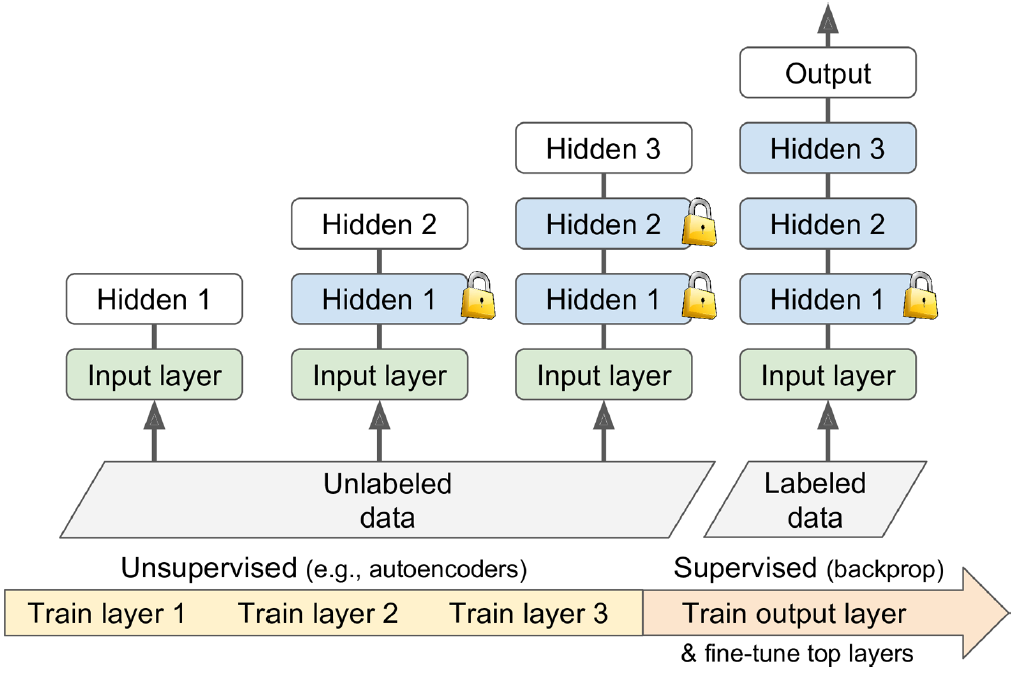

## Pretraining on an Auxiliary Task

* one last option is to **train a first neural network on an auxiliary task** for which you can **easily obtain or generate labeled training data**, 
* then **reuse the lower layers** of that network for your actual task
* The first neural network’s lower layers will **learn feature detectors** that will likely be reusable by the second neural network


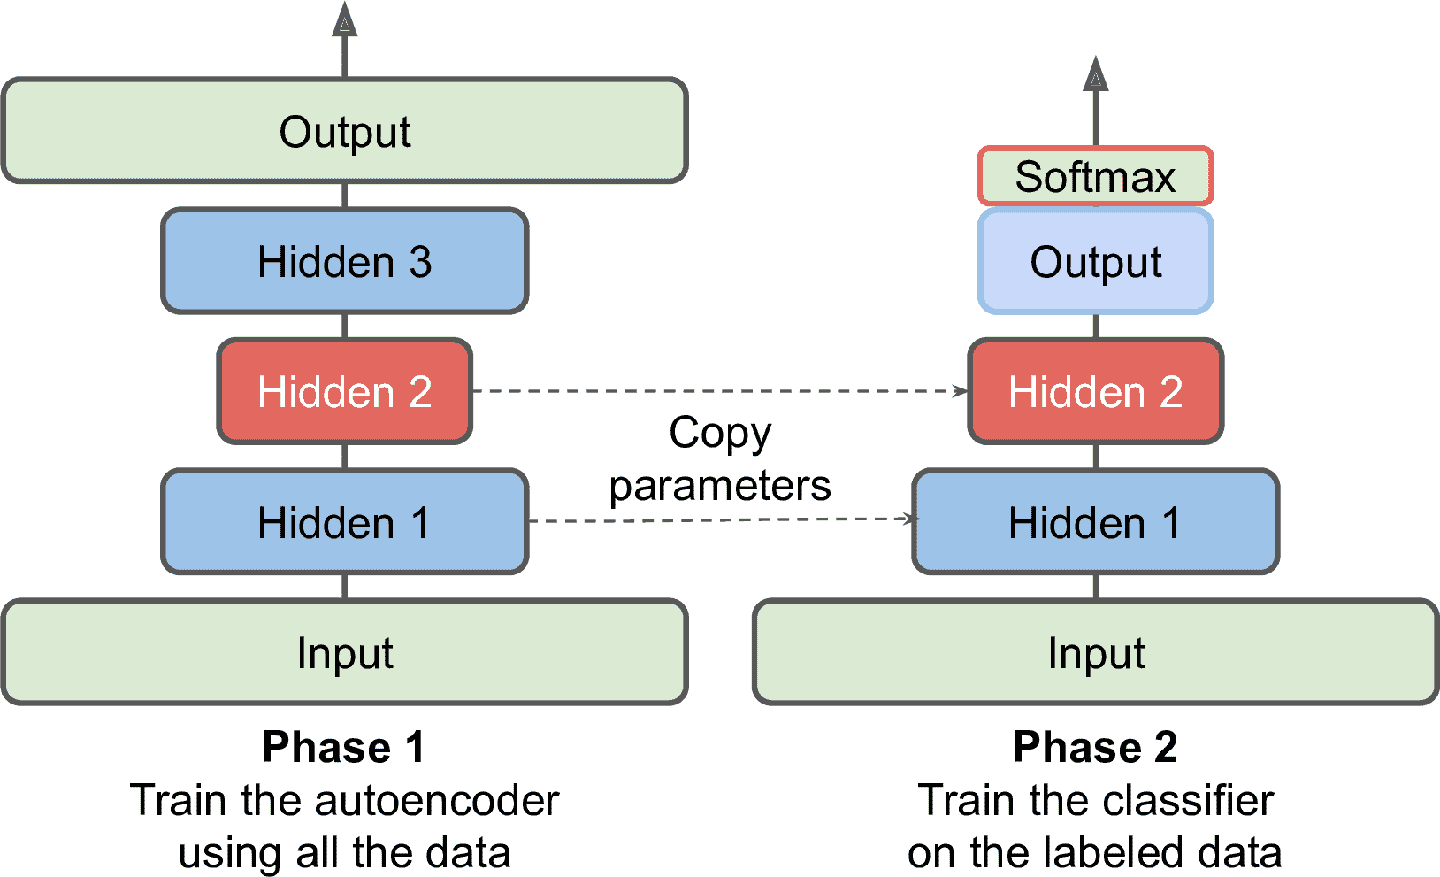

## Tying weights

It is common to tie the weights of the encoder and the decoder, by simply **using the transpose of the encoder's weights as the decoder weights**. For this, we need to use a custom layer.

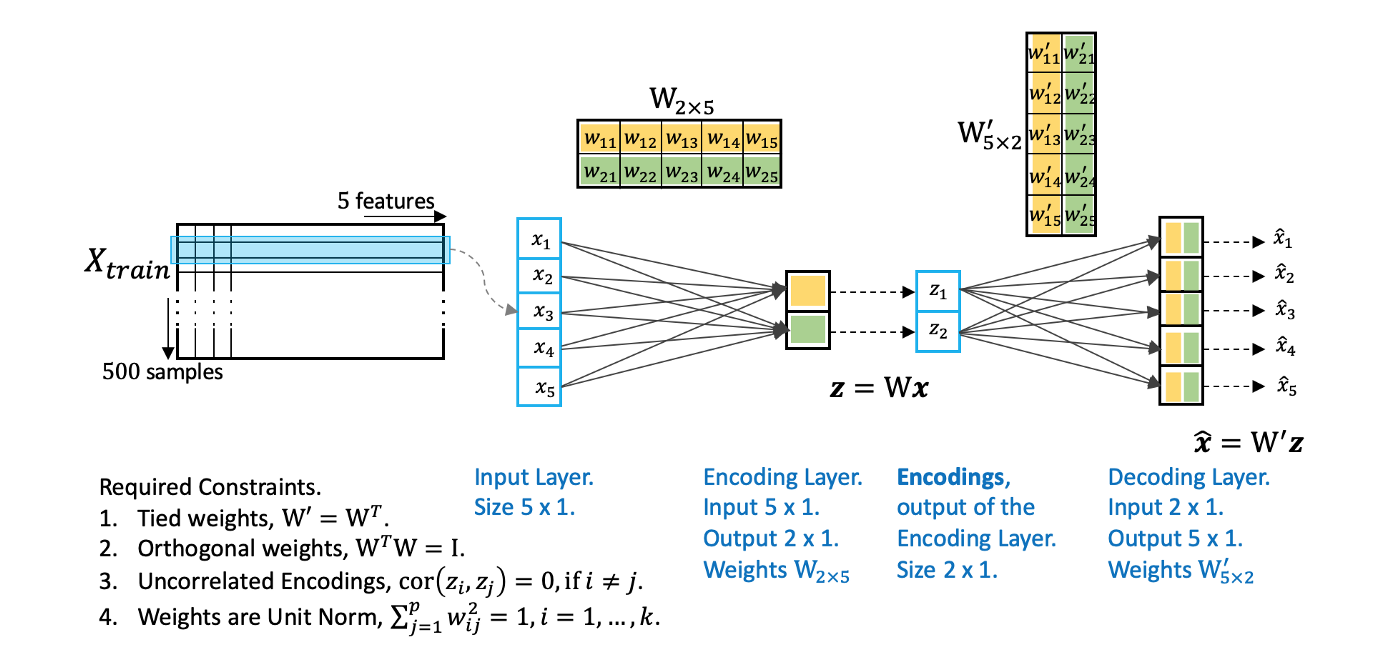

***Custom Layer: Tied weights***

* With this custom layer, we **enforce the weights on encoder and decoder as equal**. Mathematically, the transpose of decoder weights equals the encoder weights
* This **halves the number of weights in the model**, speeding up training and limiting the risk of overfitting

In [28]:
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      shape=[self.dense.input_shape[-1]],
                                      initializer="zeros")
        super().build(batch_input_shape) #batch_input_shape= (batch_size, input_dimensions)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True) # for the second argument is transposed before multiplication self.dense.weights[0] ==> (30,100)
        return self.activation(z + self.biases) # it uses its own bias vector

***Notes***

* it **uses another Dense layer’s weights**, transposed (setting transpose_b=True is equivalent to transposing the second argument)
* However, it uses its **own bias vector(not current dense's bias)**

In [29]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1, # weight shape: (784, 100) # input_shape(?,784 neurons)
    dense_2  # weight shape: (100, 30)  # input_shape(?,100 neurons)
]) # output==> (batch_size, 30)

tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

tied_ae.compile(loss="binary_crossentropy", 
                # use the binary cross-entropy loss instead of the mean squared error
                # each pixel(or each label) intensity represents the probability that the pixel should be black
                optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])
history = tied_ae.fit(X_train, X_train, epochs=10,
                      validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3269 - rounded_accuracy: 0.8960 - val_loss: 0.3082 - val_rounded_accuracy: 0.9077
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2975 - rounded_accuracy: 0.9224 - val_loss: 0.2952 - val_rounded_accuracy: 0.9284
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2920 - rounded_accuracy: 0.9274 - val_loss: 0.3020 - val_rounded_accuracy: 0.9082
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2889 - rounded_accuracy: 0.9302 - val_loss: 0.2880 - val_rounded_accuracy: 0.9332
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2865 - rounded_accuracy: 0.9325 - val_loss: 0.2874 - val_rounded_accuracy: 0.9314
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2850 - rounded_accuracy: 0.9340 - val_loss: 0.2861 - val_rounded_accuracy: 0.9354
Epoch 7/10
1719/1719 [==================

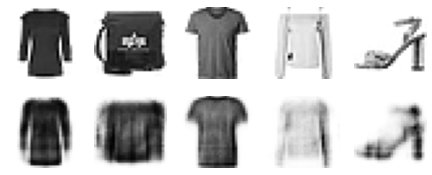

In [30]:
show_reconstructions(tied_ae)
plt.show()

## Training one Autoencoder at a Time

* greedy layerwise training

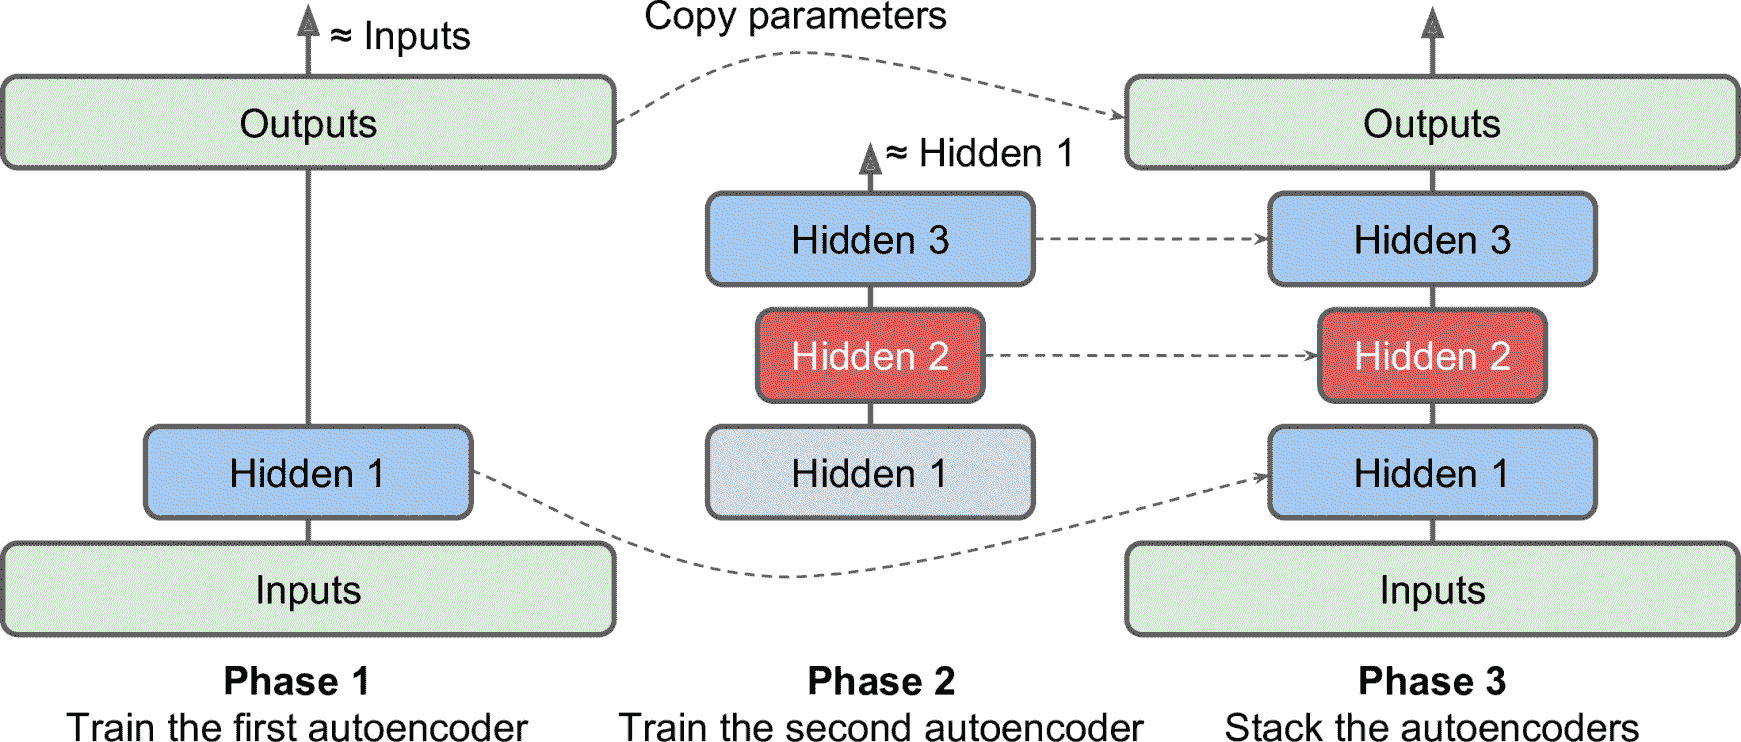

In [31]:
def train_autoencoder(n_neurons, X_train, X_valid, loss, optimizer,
                      n_epochs=10, output_activation=None, metrics=None):
    n_inputs = X_train.shape[-1]
    encoder = keras.models.Sequential([
        keras.layers.Dense(n_neurons, activation="selu", input_shape=[n_inputs])
    ])
    decoder = keras.models.Sequential([
        keras.layers.Dense(n_inputs, activation=output_activation),
    ])
    autoencoder = keras.models.Sequential([encoder, decoder])
    autoencoder.compile(optimizer, loss, metrics=metrics)
    autoencoder.fit(X_train, X_train, epochs=n_epochs,
                    validation_data=(X_valid, X_valid))
    return encoder, decoder, encoder(X_train), encoder(X_valid)

In [32]:
tf.random.set_seed(42)
np.random.seed(42)

K = keras.backend
X_train_flat = K.batch_flatten(X_train) # equivalent to .reshape(-1, 28 * 28)
X_valid_flat = K.batch_flatten(X_valid)

1st phase of training

* the first autoencoder learns to **reconstruct the inputs**.
* Then we **encode the whole training set using this first autoencoder**, and this gives us a **new (compressed) training set**.
* We then **train a second autoencoder on this new dataset**.


In [33]:
enc1, dec1, X_train_enc1, X_valid_enc1 = train_autoencoder(
    100, X_train_flat, X_valid_flat, "binary_crossentropy",
    keras.optimizers.SGD(learning_rate=1.5), output_activation="sigmoid",
    metrics=[rounded_accuracy])

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3445 - rounded_accuracy: 0.8874 - val_loss: 0.3123 - val_rounded_accuracy: 0.9146
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3039 - rounded_accuracy: 0.9203 - val_loss: 0.3006 - val_rounded_accuracy: 0.9246
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2949 - rounded_accuracy: 0.9286 - val_loss: 0.2934 - val_rounded_accuracy: 0.9317
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2891 - rounded_accuracy: 0.9342 - val_loss: 0.2888 - val_rounded_accuracy: 0.9363
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2853 - rounded_accuracy: 0.9378 - val_loss: 0.2857 - val_rounded_accuracy: 0.9392
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2827 - rounded_accuracy: 0.9403 - val_loss: 0.2834 - val_rounded_accuracy: 0.9409
Epoch 7/10
1719/1719 [==================

* 2nd phase of training

In [34]:
enc2, dec2, _, _ = train_autoencoder(
    30, X_train_enc1, X_valid_enc1, "mse", keras.optimizers.SGD(learning_rate=0.05),
    output_activation="selu")

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5620 - val_loss: 0.3408
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2612 - val_loss: 0.2369
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2252 - val_loss: 0.2174
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2109 - val_loss: 0.2058
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2035 - val_loss: 0.1973
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1987 - val_loss: 0.1978
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1971 - val_loss: 0.2002
Epoch 8/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1956 - val_loss: 0.2002
Epoch 9/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1949 - val_loss: 0.1932
Epoch 10/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.194

* Finally, we build the final stacked autoencoder using all these autoencoders

In [35]:
stacked_ae_1_by_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    enc1, enc2, dec2, dec1,
    keras.layers.Reshape([28, 28])
])

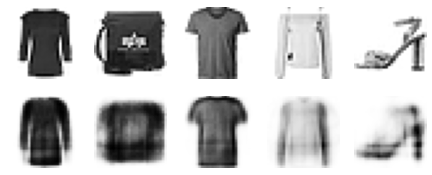

In [36]:
show_reconstructions(stacked_ae_1_by_1)
plt.show()

In [37]:
stacked_ae_1_by_1.compile(loss="binary_crossentropy",
                          optimizer=keras.optimizers.SGD(learning_rate=0.1), metrics=[rounded_accuracy])
history = stacked_ae_1_by_1.fit(X_train, X_train, epochs=10,
                                validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2867 - rounded_accuracy: 0.9343 - val_loss: 0.2883 - val_rounded_accuracy: 0.9341
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2863 - rounded_accuracy: 0.9347 - val_loss: 0.2881 - val_rounded_accuracy: 0.9347
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2861 - rounded_accuracy: 0.9349 - val_loss: 0.2879 - val_rounded_accuracy: 0.9347
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2859 - rounded_accuracy: 0.9351 - val_loss: 0.2877 - val_rounded_accuracy: 0.9350
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2858 - rounded_accuracy: 0.9353 - val_loss: 0.2876 - val_rounded_accuracy: 0.9351
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2857 - rounded_accuracy: 0.9354 - val_loss: 0.2874 - val_rounded_accuracy: 0.9351
Epoch 7/10
1719/1719 [==================

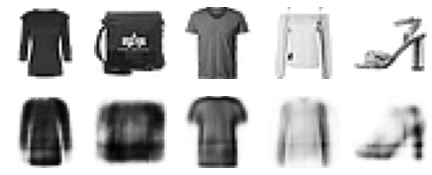

In [38]:
show_reconstructions(stacked_ae_1_by_1)
plt.show()

## Using Convolutional Layers Instead of Dense Layers

* the autoencoders we have seen so far will **not work well on images (unless the images are very small)**
* **convolutional neural networks** are far better suited than dense networks to **work with images**
* Now we will build a convolutional autoencoder

Let's build a stacked Autoencoder with 3 hidden layers and 1 output layer (i.e., 2 stacked Autoencoders).

* The encoder is a regular **CNN composed of convolutional layers and pooling layers**.
* It typically **reduces the spatial dimensionality** of the inputs (i.e., height and width) while **increasing the depth** (i.e., the number of feature maps).

* The decoder must do the reverse (**upscale the image** and reduce its depth back to the original dimensions), and for this you can use **transpose convolutional layers** (alternatively, you could combine upsampling layers with convolutional layers). 



In [39]:
tf.random.set_seed( 42 )
np.random.seed( 42 )

conv_encoder = keras.models.Sequential([
  keras.layers.Reshape( [28, 28, 1], input_shape=[28,28] ),

  keras.layers.Conv2D( filters=16, kernel_size=3, padding="SAME",
                       activation="selu" ),                         #==> (None, 28, 28, 16)
  keras.layers.MaxPool2D(pool_size=2),#strides default to pool_size #==> (None, 14, 14, 16)
  # max pooling preserves only the strongest features, getting rid of all the meaningless ones
  keras.layers.Conv2D( filters=32, kernel_size=3, padding="SAME",
                       activation="selu" ),                         #==> (None, 14, 14, 32)
  keras.layers.MaxPool2D(pool_size=2),                              #==> (None, 7, 7, 32)

  keras.layers.Conv2D( filters=64, kernel_size=3, padding="SAME",   #==> (None, 7, 7, 64)
                       activation="selu" ),
  keras.layers.MaxPool2D(pool_size=2),                              #==> (None, 3, 3, 64)
]) # output==>28x28 x64

conv_decoder = keras.models.Sequential([
  keras.layers.Conv2DTranspose( 32, kernel_size=3, strides=2, padding="VALID", # padding="VALID" since 3*2 !=7
                                activation="selu", input_shape=[3,3,64]), #==> (None, 7, 7, 32)
  keras.layers.Conv2DTranspose( 16, kernel_size=3, strides=2, padding="SAME",  # 7x2 (strides)=14 and padding=0.5
                                activation="selu" ),   #==> (None, 14, 14, 16)
  keras.layers.Conv2DTranspose( 1, kernel_size=3, strides=2, padding="SAME",   # 14x2(strides)=28
                                activation="sigmoid" ),   #==> (None, 28, 28, 1)
  keras.layers.Reshape([28,28])
])

conv_ae = keras.models.Sequential([ conv_encoder, conv_decoder ])
conv_ae.compile( loss="binary_crossentropy",
                 optimizer=keras.optimizers.SGD( lr=1.0 ),
                 metrics=[rounded_accuracy]
               )
history = conv_ae.fit( X_train, X_train, epochs=5,
                       validation_data=(X_valid, X_valid)
                     )

Epoch 1/5
1719/1719 [==============================] - 65s 37ms/step - loss: 0.3018 - rounded_accuracy: 0.9187 - val_loss: 0.2849 - val_rounded_accuracy: 0.9284
Epoch 2/5
1719/1719 [==============================] - 64s 37ms/step - loss: 0.2756 - rounded_accuracy: 0.9413 - val_loss: 0.2729 - val_rounded_accuracy: 0.9454
Epoch 3/5
1719/1719 [==============================] - 64s 37ms/step - loss: 0.2708 - rounded_accuracy: 0.9462 - val_loss: 0.2697 - val_rounded_accuracy: 0.9496
Epoch 4/5
1719/1719 [==============================] - 64s 37ms/step - loss: 0.2682 - rounded_accuracy: 0.9490 - val_loss: 0.2684 - val_rounded_accuracy: 0.9494
Epoch 5/5
1719/1719 [==============================] - 64s 37ms/step - loss: 0.2664 - rounded_accuracy: 0.9509 - val_loss: 0.2672 - val_rounded_accuracy: 0.9508


In [26]:
conv_encoder.summary()
conv_decoder.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)        

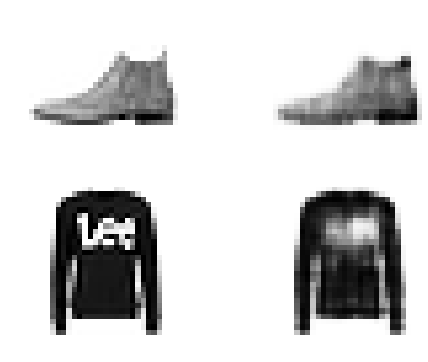

In [27]:
show_reconstructions(conv_ae)
plt.show()

# Recurrent Autoencoders

***Autoencoder also works for sequences, such as time series or text***

* **recurrent neural networks** may be better suited than dense networks
* the encoder is typically a **sequence-to-vector RNN** which compresses the input sequence down to a single vector.
* The decoder is a **vector-to-sequence RNN** that does the reverse:



In [43]:
recurrent_encoder = keras.models.Sequential([
    keras.layers.LSTM( 100, return_sequences=True, input_shape=[28,28] ), #[None, 28,28] ==> (None, 28, 100)
    keras.layers.LSTM( 30 ) #return_sequences=False                #==> (None, 30)
])

recurrent_decoder = keras.models.Sequential([
    # use a RepeatVector layer as the first layer of the decoder, 
    # to ensure that its input vector gets fed to the decoder at each time step.
      keras.layers.RepeatVector( 28, input_shape=[30] ), #==> (None, 28, 30)
      keras.layers.LSTM( 100, return_sequences=True ),   #==> (None, 28, 100)
      keras.layers.TimeDistributed( keras.layers.Dense( 28, activation="sigmoid" ) )
    ])                                                   #==> (None, 28, 28)


recurrent_ae = keras.models.Sequential([ recurrent_encoder, recurrent_decoder ])

recurrent_ae.compile( loss="binary_crossentropy",
                      optimizer=keras.optimizers.SGD(0.1),
                      metrics=[rounded_accuracy]
                    )

***Some thoughts***

* can process sequences of any length, with 28 dimensions per time step
* Conveniently, this means it can process Fashion MNIST images by treating each image as a sequence of rows: at each time step, the RNN will process a single row of 28 pixels.

In [44]:
history = recurrent_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 118s 65ms/step - loss: 0.5111 - rounded_accuracy: 0.7523 - val_loss: 0.4444 - val_rounded_accuracy: 0.8170
Epoch 2/10
1719/1719 [==============================] - 111s 64ms/step - loss: 0.4029 - rounded_accuracy: 0.8409 - val_loss: 0.3762 - val_rounded_accuracy: 0.8626
Epoch 3/10
1719/1719 [==============================] - 110s 64ms/step - loss: 0.3676 - rounded_accuracy: 0.8666 - val_loss: 0.3621 - val_rounded_accuracy: 0.8729
Epoch 4/10
1719/1719 [==============================] - 111s 65ms/step - loss: 0.3563 - rounded_accuracy: 0.8762 - val_loss: 0.3528 - val_rounded_accuracy: 0.8807
Epoch 5/10
1719/1719 [==============================] - 111s 64ms/step - loss: 0.3483 - rounded_accuracy: 0.8833 - val_loss: 0.3476 - val_rounded_accuracy: 0.8829
Epoch 6/10
1719/1719 [==============================] - 111s 65ms/step - loss: 0.3401 - rounded_accuracy: 0.8887 - val_loss: 0.3400 - val_rounded_accuracy: 0.8842
Epoch 7/10
1719/1719 [

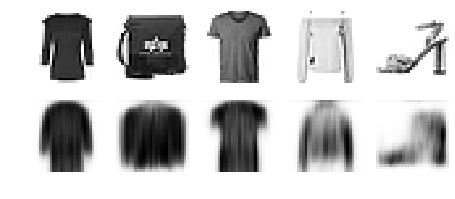

In [30]:
show_reconstructions(recurrent_ae)
plt.show()

### Summary of what we learned so far.

* various kinds of autoencoders
    * basic, 
    * stacked, 
    * convolutional, 
    * recurrent
    
* Training autoencoders
    * in one shot 
    * or layer by layer
    
    
* applications
    * data visualization
    * unsupervised pretraining
    
    
* How to force autoencoders to learn interesting features?
    * limit the size of the coding layer, making it undercomplete
    * **add noise to its inputs, training it to recover the original, noise-free inputs -- stacked denoising autoencoders**

# Stacked denoising Autoencoder (Gaussian noise OR dropout)



* force to pay attention to each of their input neurons. 
* end up being less sensitive to slight changes in the inputs. 
* In the end, you get a more robust network that generalizes better


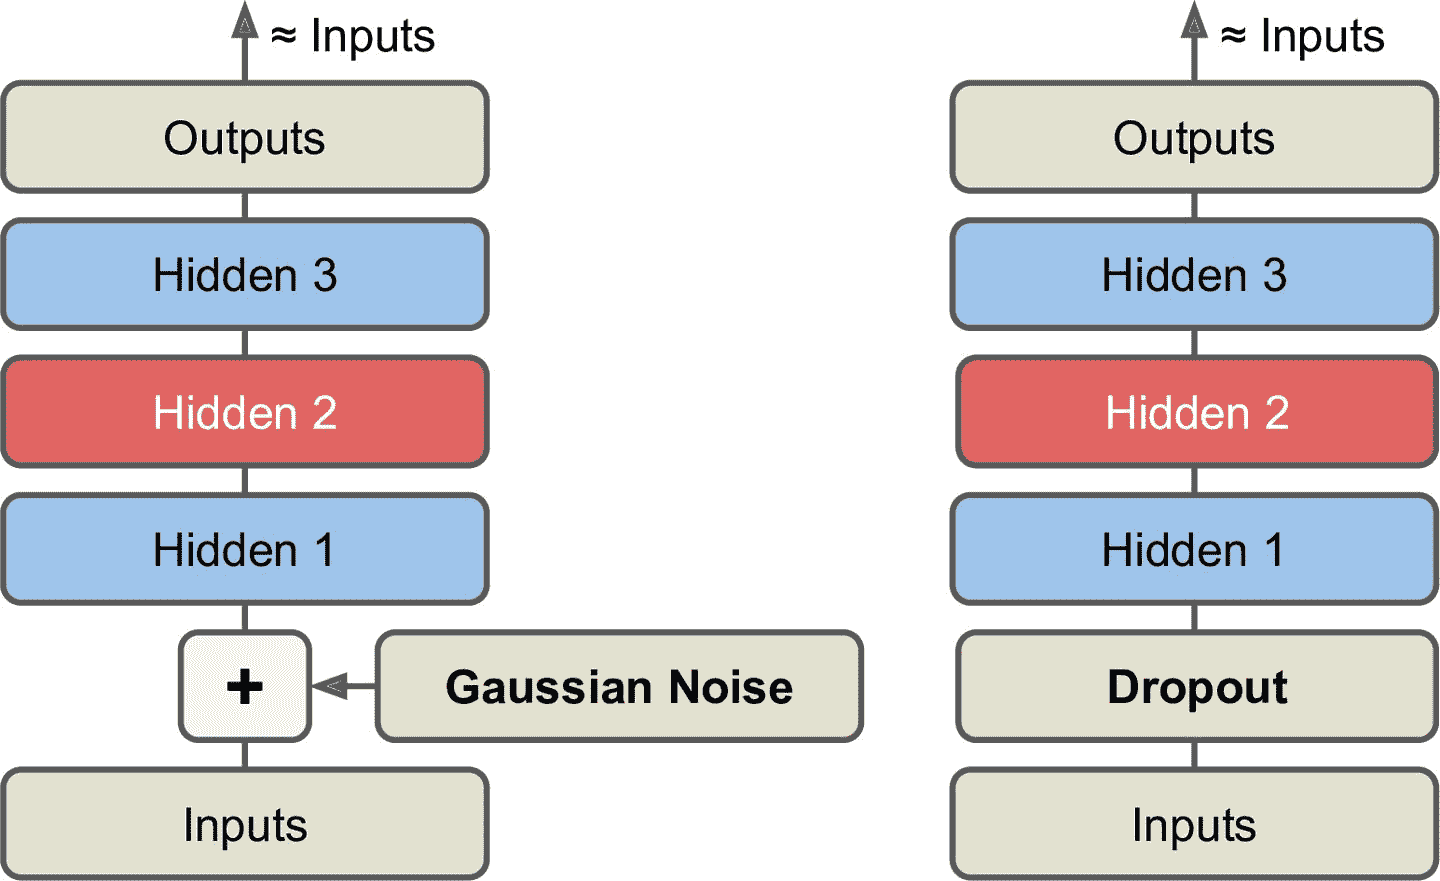

***Using Gaussian noise***

In [31]:
tf.random.set_seed(42)
np.random.seed(42)

denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                     metrics=[rounded_accuracy])
history = denoising_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 82us/sample - loss: 0.3508 - rounded_accuracy: 0.8768 - val_loss: 0.3231 - val_rounded_accuracy: 0.9065
Epoch 2/10
55000/55000 [==============================] - 4s 75us/sample - loss: 0.3125 - rounded_accuracy: 0.9093 - val_loss: 0.3077 - val_rounded_accuracy: 0.9153
Epoch 3/10
55000/55000 [==============================] - 4s 74us/sample - loss: 0.3061 - rounded_accuracy: 0.9149 - val_loss: 0.3034 - val_rounded_accuracy: 0.9190
Epoch 4/10
55000/55000 [==============================] - 4s 75us/sample - loss: 0.3025 - rounded_accuracy: 0.9181 - val_loss: 0.3007 - val_rounded_accuracy: 0.9195
Epoch 5/10
55000/55000 [==============================] - 4s 75us/sample - loss: 0.2998 - rounded_accuracy: 0.9203 - val_loss: 0.2980 - val_rounded_accuracy: 0.9230
Epoch 6/10
55000/55000 [==============================] - 4s 78us/sample - loss: 0.2979 - rounded_accuracy: 0.9220 - val_loss:

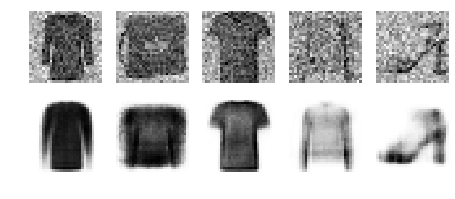

In [32]:
tf.random.set_seed(42)
np.random.seed(42)

noise = keras.layers.GaussianNoise(0.2)
show_reconstructions(denoising_ae, noise(X_valid, training=True))
plt.show()

***Using dropout***

In [33]:
tf.random.set_seed(42)
np.random.seed(42)

dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])
dropout_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                   metrics=[rounded_accuracy])
history = dropout_ae.fit(X_train, X_train, epochs=10,
                         validation_data=(X_valid, X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 83us/sample - loss: 0.3564 - accuracy: 0.4969 - val_loss: 0.3206 - val_accuracy: 0.5011
Epoch 2/10
55000/55000 [==============================] - 4s 73us/sample - loss: 0.3182 - accuracy: 0.5034 - val_loss: 0.3113 - val_accuracy: 0.5014
Epoch 3/10
55000/55000 [==============================] - 4s 74us/sample - loss: 0.3130 - accuracy: 0.5042 - val_loss: 0.3079 - val_accuracy: 0.5012
Epoch 4/10
55000/55000 [==============================] - 4s 73us/sample - loss: 0.3091 - accuracy: 0.5048 - val_loss: 0.3037 - val_accuracy: 0.5026
Epoch 5/10
55000/55000 [==============================] - 4s 76us/sample - loss: 0.3066 - accuracy: 0.5052 - val_loss: 0.3032 - val_accuracy: 0.5016
Epoch 6/10
55000/55000 [==============================] - 4s 78us/sample - loss: 0.3047 - accuracy: 0.5054 - val_loss: 0.3001 - val_accuracy: 0.5032
Epoch 7/10
55000/55000 [==============================] -

Saving figure dropout_denoising_plot


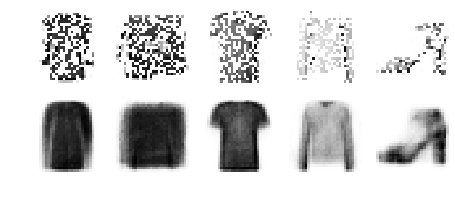

In [34]:
tf.random.set_seed(42)
np.random.seed(42)

dropout = keras.layers.Dropout(0.5)
show_reconstructions(dropout_ae, dropout(X_valid, training=True))
save_fig("dropout_denoising_plot", tight_layout=False)

# Sparse Autoencoder

* by
adding an appropriate term to the cost function, the autoencoder is pushed to reduce
the number of active neurons in the coding layer

* This forces
the autoencoder to represent each input as a combination of a small number of activations.

* As a result, each neuron in the coding layer typically ends up representing a
useful feature

Let's build a simple stacked autoencoder, so we can compare it to the sparse autoencoders we will build. This time we will **use the sigmoid activation function for the coding layer, to ensure that the coding values range from 0 to 1:**

In [45]:
tf.random.set_seed(42)
np.random.seed(42)

simple_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="sigmoid"), # use the sigmoid activation function in the coding layer (to constrain the codings to values between 0 and 1)
])
simple_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
simple_ae = keras.models.Sequential([simple_encoder, simple_decoder])
simple_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.),
                  metrics=[rounded_accuracy])
history = simple_ae.fit(X_train, X_train, epochs=10,
                        validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4329 - rounded_accuracy: 0.7950 - val_loss: 0.3773 - val_rounded_accuracy: 0.8492
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3612 - rounded_accuracy: 0.8668 - val_loss: 0.3514 - val_rounded_accuracy: 0.8797
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3410 - rounded_accuracy: 0.8852 - val_loss: 0.3367 - val_rounded_accuracy: 0.8912
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3288 - rounded_accuracy: 0.8953 - val_loss: 0.3263 - val_rounded_accuracy: 0.8992
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3213 - rounded_accuracy: 0.9011 - val_loss: 0.3210 - val_rounded_accuracy: 0.9032
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3176 - rounded_accuracy: 0.9038 - val_loss: 0.3179 - val_rounded_accuracy: 0.9050
Epoch 7/10
1719/1719 [==================

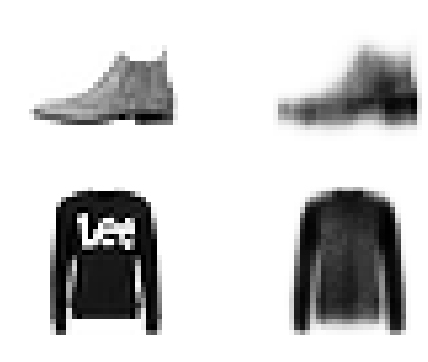

In [36]:
show_reconstructions(simple_ae)
plt.show()

Now let's add $\ell_1$ regularization to the coding layer:

* This penalty will encourage the neural network to produce codings close to 0, but it will have to output at least a few nonzero values. 
* Using the ℓ1 norm rather than the ℓ2 norm will push the neural network to preserve the most important codings while eliminating the ones that are not needed for the input image (rather than just reducing all codings).

In [40]:
tf.random.set_seed(42)
np.random.seed(42)

sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid"),
    keras.layers.ActivityRegularization(l1=1e-3)  # Alternatively, you could add
                                                  # activity_regularizer=keras.regularizers.l1(1e-3)
                                                  # to the previous layer.
])
sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])
sparse_l1_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                     metrics=[rounded_accuracy])
history = sparse_l1_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.4306 - accuracy: 0.4947 - val_loss: 0.3819 - val_accuracy: 0.4897
Epoch 2/10
55000/55000 [==============================] - 4s 75us/sample - loss: 0.3689 - accuracy: 0.4971 - val_loss: 0.3639 - val_accuracy: 0.4940
Epoch 3/10
55000/55000 [==============================] - 5s 86us/sample - loss: 0.3553 - accuracy: 0.4987 - val_loss: 0.3513 - val_accuracy: 0.4970
Epoch 4/10
55000/55000 [==============================] - 4s 78us/sample - loss: 0.3443 - accuracy: 0.5003 - val_loss: 0.3428 - val_accuracy: 0.4964
Epoch 5/10
55000/55000 [==============================] - 4s 76us/sample - loss: 0.3379 - accuracy: 0.5009 - val_loss: 0.3372 - val_accuracy: 0.4979
Epoch 6/10
55000/55000 [==============================] - 4s 76us/sample - loss: 0.3332 - accuracy: 0.5015 - val_loss: 0.3329 - val_accuracy: 0.4980
Epoch 7/10
55000/55000 [==============================] -

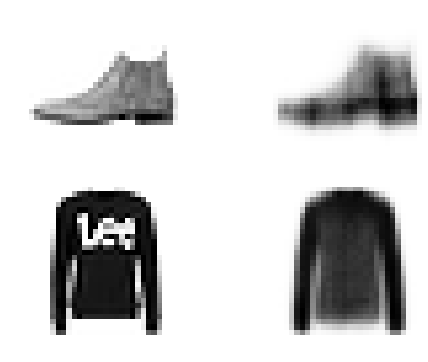

In [41]:
show_reconstructions(sparse_l1_ae)

# Variational Autoencoder

* They are **probabilistic autoencoders**, meaning that their outputs are partly determined
by chance, even after training (as opposed to denoising autoencoders,
which use randomness only during training).
* Most importantly, they are **generative autoencoders**, meaning that they can generate
new instances that look like they were sampled from the training set.

***Steps***

* First, the encoder produces μ and σ,
* then **a coding is sampled randomly** (notice that it is not exactly located at μ), and
* finally this coding is decoded; the final output resembles the training instance.



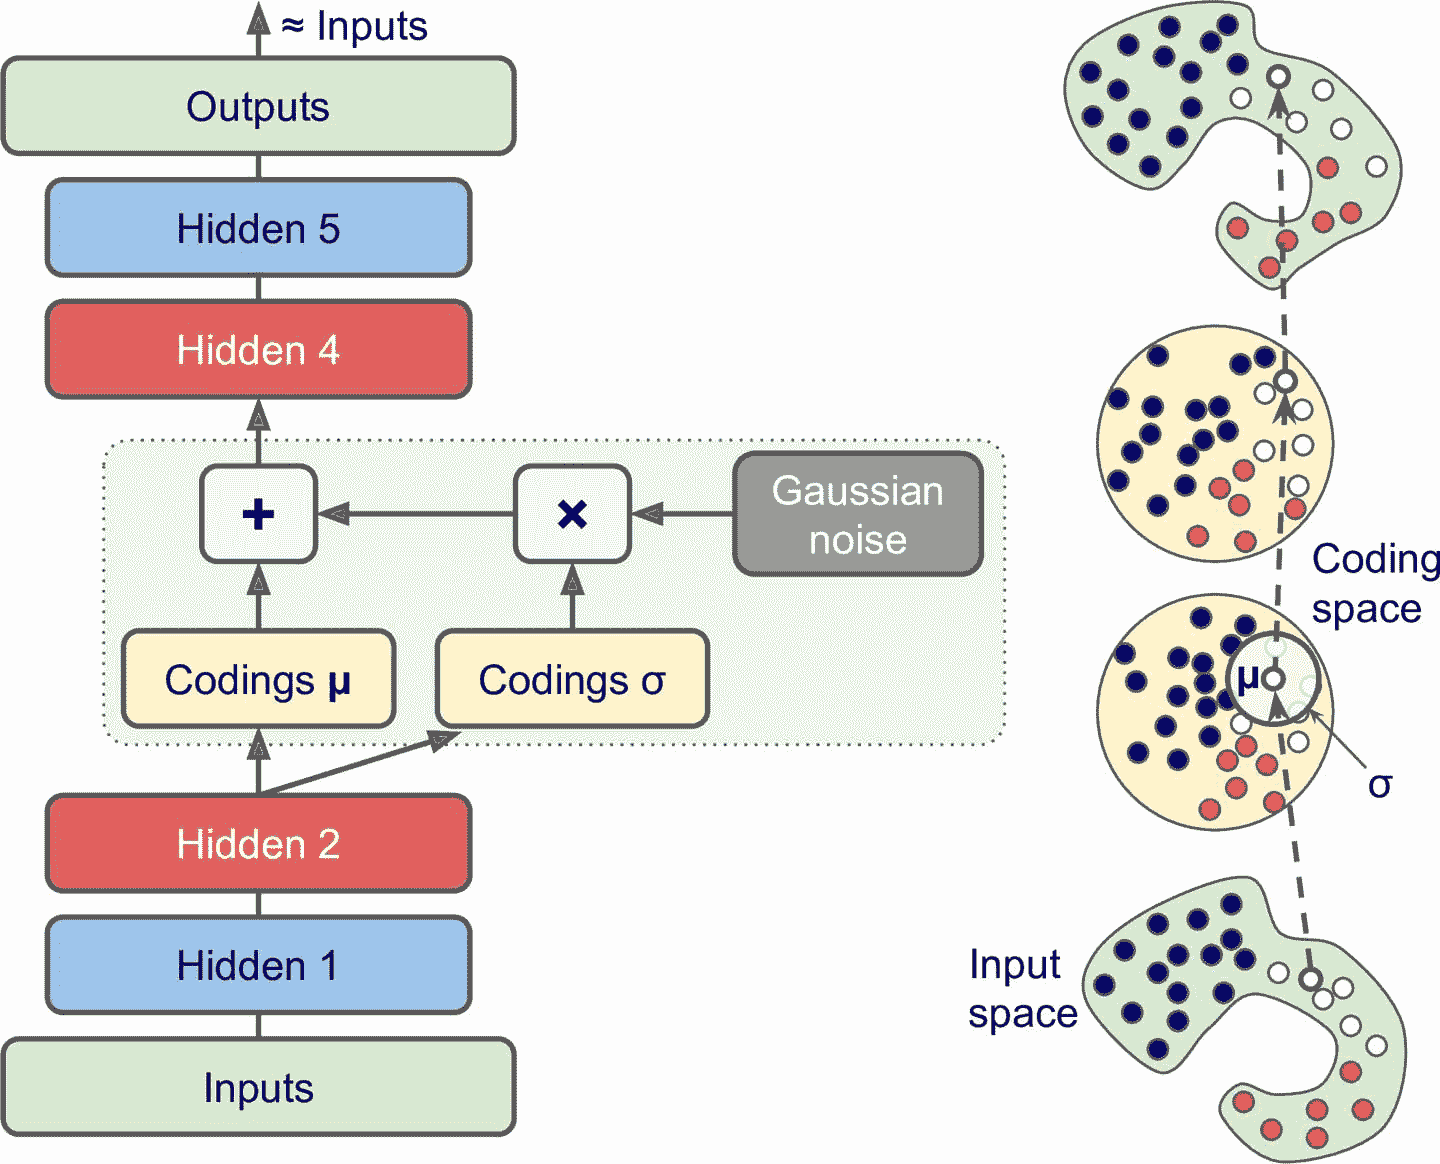

In [48]:
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean 

In [49]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 10

inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=[rounded_accuracy])
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=(X_valid, X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 5s 84us/sample - loss: 0.3889 - rounded_accuracy: 0.8608 - val_loss: 0.3592 - val_rounded_accuracy: 0.8840
Epoch 2/25
55000/55000 [==============================] - 3s 60us/sample - loss: 0.3429 - rounded_accuracy: 0.8974 - val_loss: 0.3369 - val_rounded_accuracy: 0.8982
Epoch 3/25
55000/55000 [==============================] - 3s 53us/sample - loss: 0.3329 - rounded_accuracy: 0.9050 - val_loss: 0.3356 - val_rounded_accuracy: 0.9022
Epoch 4/25
55000/55000 [==============================] - 3s 61us/sample - loss: 0.3275 - rounded_accuracy: 0.9092 - val_loss: 0.3255 - val_rounded_accuracy: 0.9105
Epoch 5/25
55000/55000 [==============================] - 3s 59us/sample - loss: 0.3243 - rounded_accuracy: 0.9119 - val_loss: 0.3232 - val_rounded_accuracy: 0.9169
Epoch 6/25
55000/55000 [==============================] - 3s 58us/sample - loss: 0.3219 - rounded_accuracy: 0.9138 - val_loss:

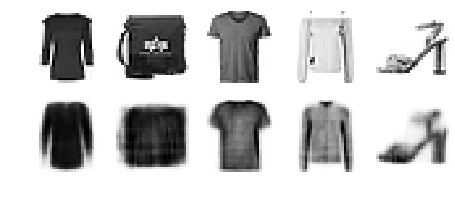

In [50]:
show_reconstructions(variational_ae)
plt.show()

## Generate Fashion Images


***Variational autoencoders make it possible to interpolate at the codings level***

* We first run both images through the encoder,
* then we interpolate the two codings we get, and
* finally we decode the interpolated codings to get the final image. It will look like a regular Fashion MNIST image, but it will be an intermediate between the original images.


In [51]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

Let's generate a few random codings, decode them and plot the resulting images:

Saving figure vae_generated_images_plot


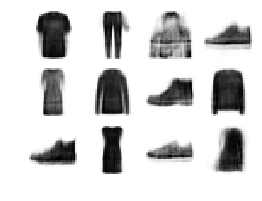

In [52]:
tf.random.set_seed(42)

codings = tf.random.normal(shape=[12, codings_size])
images = variational_decoder(codings).numpy()
plot_multiple_images(images, 4)
save_fig("vae_generated_images_plot", tight_layout=False)

Now let's perform semantic interpolation between these images:

Saving figure semantic_interpolation_plot


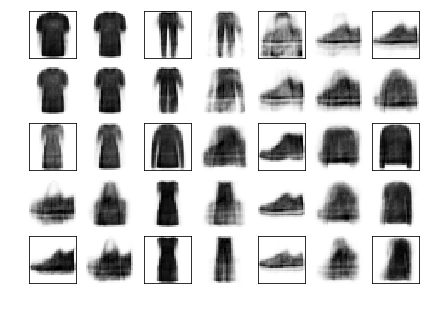

In [53]:
tf.random.set_seed(42)
np.random.seed(42)

codings_grid = tf.reshape(codings, [1, 3, 4, codings_size])
larger_grid = tf.image.resize(codings_grid, size=[5, 7])
interpolated_codings = tf.reshape(larger_grid, [-1, codings_size])
images = variational_decoder(interpolated_codings).numpy()

plt.figure(figsize=(7, 5))
for index, image in enumerate(images):
    plt.subplot(5, 7, index + 1)
    if index%7%2==0 and index//7%2==0:
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
    else:
        plt.axis("off")
    plt.imshow(image, cmap="binary")
save_fig("semantic_interpolation_plot", tight_layout=False)